# Predict the Automobile Insurance claim

In [2]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing in the dataset
df = pd.read_csv('Auto_claim_amount.csv')

In [3]:
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [4]:
df.shape

(9134, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [6]:
df.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [7]:
# percentage of missing values in the dataframe
df.isna().mean()*100

Customer                         0.0
Country                          0.0
State Code                       0.0
State                            0.0
Claim Amount                     0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Claim Reason                     0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

We do not have any null values in the dataset 

In [8]:
# checking the correaltions 
df.corr()

Claim Amount    Income  Monthly Premium Auto  \
Claim Amount                       1.000000  0.024366              0.396262   
Income                             0.024366  1.000000             -0.016665   
Monthly Premium Auto               0.396262 -0.016665              1.000000   
Months Since Last Claim            0.011517 -0.026715              0.005026   
Months Since Policy Inception      0.009418 -0.000875              0.020257   
Number of Open Complaints         -0.036343  0.006408             -0.013122   
Number of Policies                 0.021955 -0.008656             -0.011233   
Total Claim Amount                 0.226451 -0.355254              0.632017   

                               Months Since Last Claim  \
Claim Amount                                  0.011517   
Income                                       -0.026715   
Monthly Premium Auto                          0.005026   
Months Since Last Claim                       1.000000   
Months Since Policy Inception                -0.042959   
Number of Open Complaints                     0.005354   
Number of Policies                            0.009136   
Total Claim Amount                            0.007563   

                               Months Since Policy Inception  \
Claim Amount                                        0.009418   
Income                                             -0.000875   
Monthly Premium Auto                                0.020257   
Months Since Last Claim                            -0.042959   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.001158   
Number of Policies                                 -0.013333   
Total Claim Amount                                  0.003335   

                               Number of Open Complaints  Number of Policies  \
Claim Amount                                   -0.036343            0.021955   
Income                                          0.006408           -0.008656   
Monthly Premium Auto                           -0.013122           -0.011233   
Months Since Last Claim                         0.005354            0.009136   
Months Since Policy Inception                  -0.001158           -0.013333   
Number of Open Complaints                       1.000000            0.001498   
Number of Policies                              0.001498            1.000000   
Total Claim Amount                             -0.014241           -0.002354   

                               Total Claim Amount  
Claim Amount                             0.226451  
Income                                  -0.355254  
Monthly Premium Auto                     0.632017  
Months Since Last Claim                  0.007563  
Months Since Policy Inception            0.003335  
Number of Open Complaints               -0.014241  
Number of Policies                      -0.002354  
Total Claim Amount                       1.000000

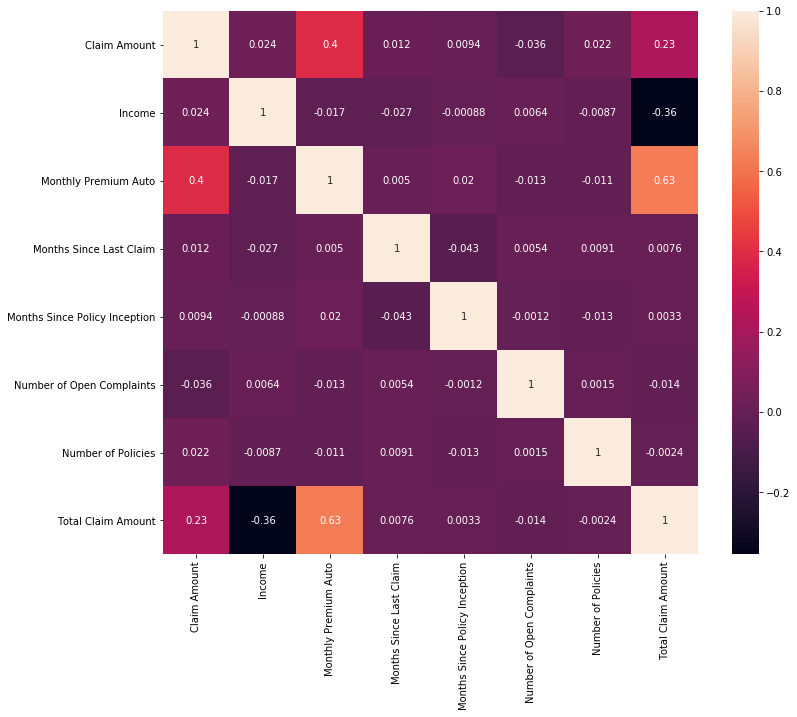

In [9]:
# Plotting the correaltions
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot =True)

In [10]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
for i in df.columns:
    print("unique counts for", i ,"is", df[i].nunique() )

unique counts for Customer is 9134
unique counts for Country is 1
unique counts for State Code is 5
unique counts for State is 5
unique counts for Claim Amount is 8041
unique counts for Response is 2
unique counts for Coverage is 3
unique counts for Education is 5
unique counts for Effective To Date is 59
unique counts for EmploymentStatus is 5
unique counts for Gender is 2
unique counts for Income is 5694
unique counts for Location Code is 3
unique counts for Marital Status is 3
unique counts for Monthly Premium Auto is 202
unique counts for Months Since Last Claim is 36
unique counts for Months Since Policy Inception is 100
unique counts for Number of Open Complaints is 6
unique counts for Number of Policies is 9
unique counts for Policy Type is 3
unique counts for Policy is 9
unique counts for Claim Reason is 4
unique counts for Sales Channel is 4
unique counts for Total Claim Amount is 5106
unique counts for Vehicle Class is 6
unique counts for Vehicle Size is 3


In [193]:
df.drop(['Customer','Effective To Date'] , axis = 1 , inplace = True)

In [194]:
df.columns

Index(['Country', 'State Code', 'State', 'Claim Amount', 'Response',
       'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [195]:
# finding the numerical and the categorical features
num_var,cat_var = [],[]
for col in df:
    
    if len(df[col].value_counts()) > 10:
        
        num_var.append(col)
    else:
        cat_var.append(col)

In [196]:
num_var

['Claim Amount',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

In [197]:
cat_var

['Country',
 'State Code',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

# EDA

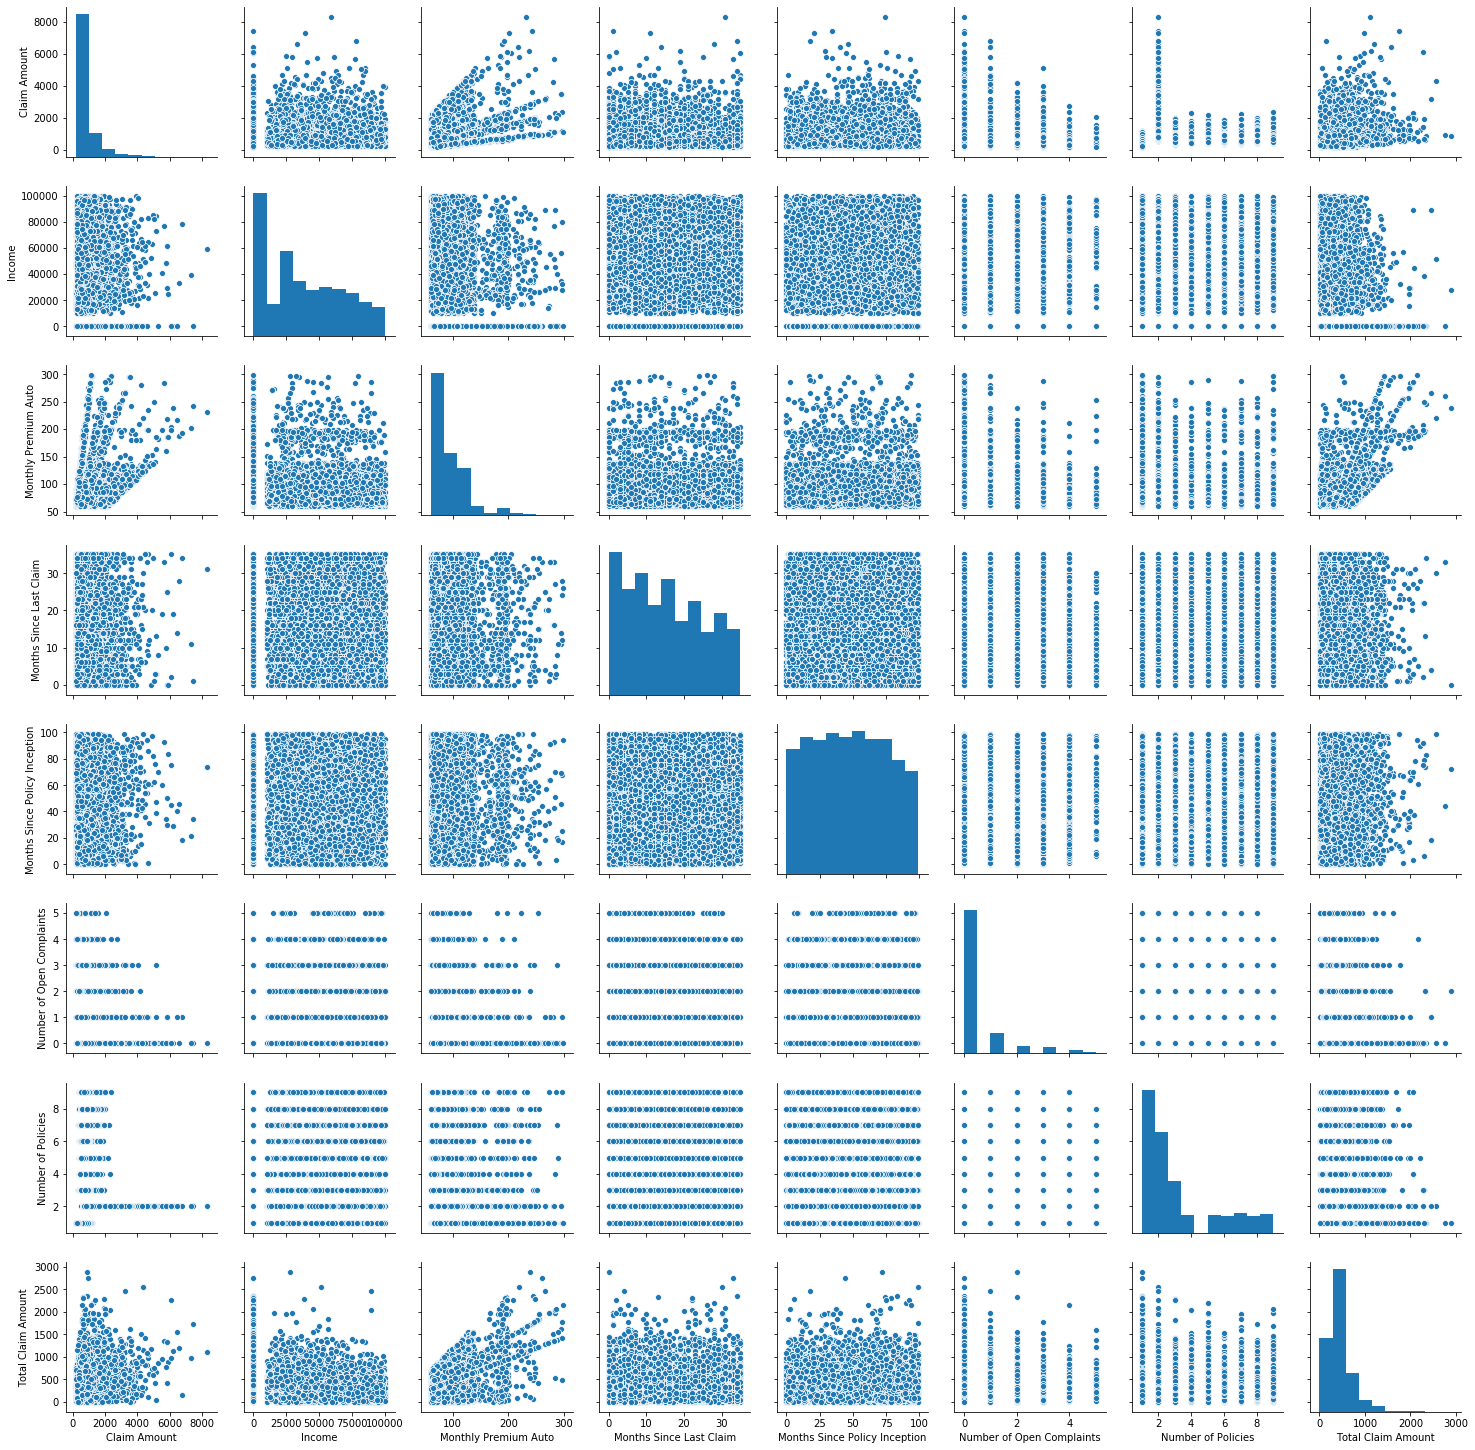

In [4]:
sns.pairplot(df)

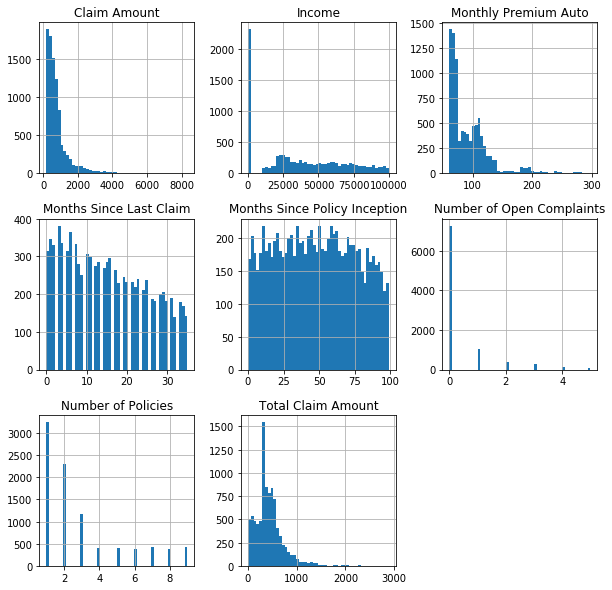

In [16]:
df.hist(bins=50, figsize = (10,10))
plt.show()

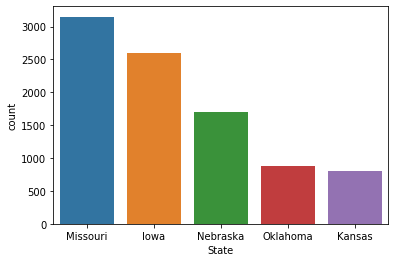

In [17]:
#Checking the count according to the states
sns.countplot(df.State,order=df.State.value_counts().index)

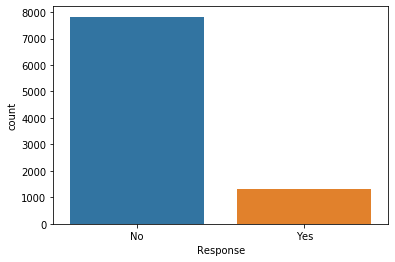

In [18]:
sns.countplot(df.Response)

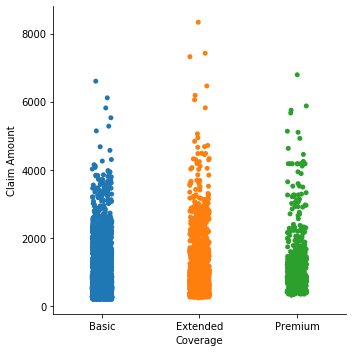

In [20]:

sns.catplot('Coverage','Claim Amount', data = df)

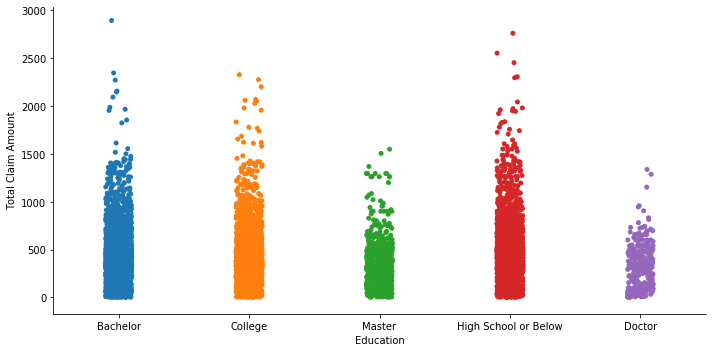

In [21]:
sns.catplot('Education','Total Claim Amount',aspect=2, data=df , )

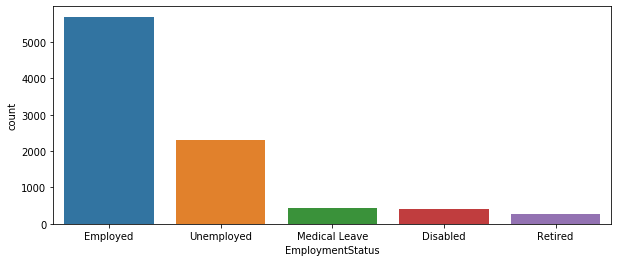

In [22]:
plt.figure(figsize=(10,4)) 
sns.countplot(df.EmploymentStatus,order = df.EmploymentStatus.value_counts().index)

<Figure size 720x288 with 0 Axes>

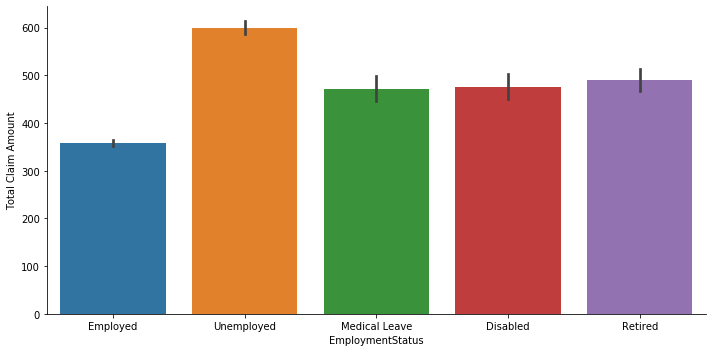

In [23]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'EmploymentStatus' ,y = 'Total Claim Amount' , data = df, aspect = 2 , kind = 'bar')

Unemployed people have the maximum claim amounts

<Figure size 720x288 with 0 Axes>

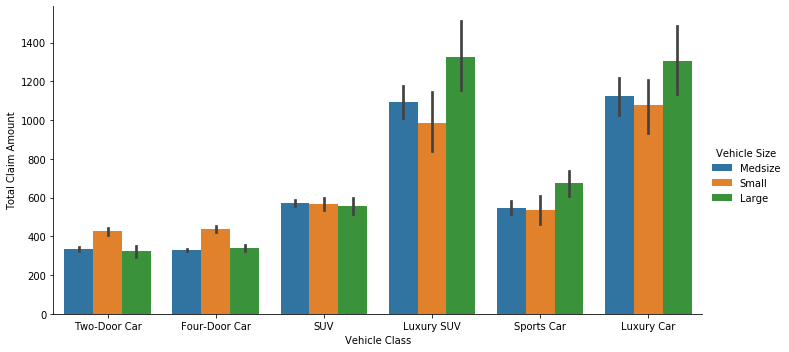

In [24]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'Vehicle Class' ,y = 'Total Claim Amount' , hue = 'Vehicle Size' ,data = df, aspect = 2 , kind = 'bar')

luxury cars have highest claim amount with large size at the top

<Figure size 720x288 with 0 Axes>

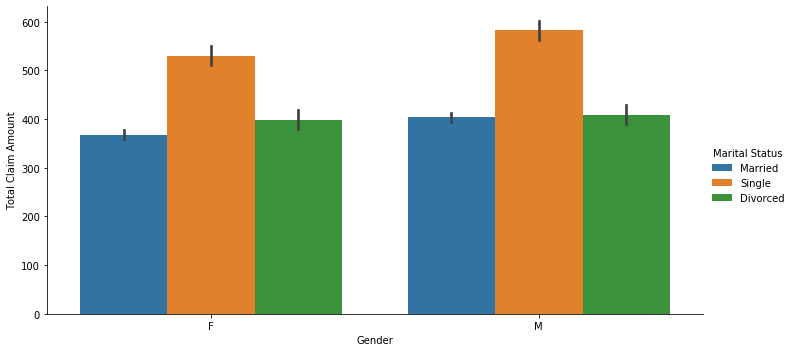

In [25]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'Gender' ,y = 'Total Claim Amount' , hue = 'Marital Status',data = df, aspect = 2 , kind = 'bar')

Single Males have hight claim amounts

<Figure size 720x288 with 0 Axes>

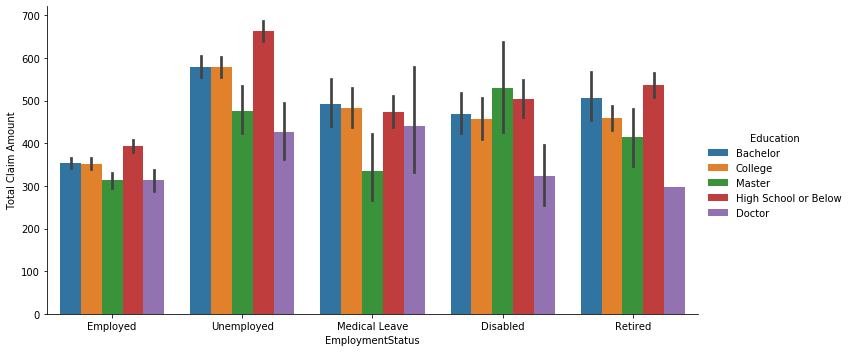

In [26]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'EmploymentStatus' ,y = 'Total Claim Amount' , hue = 'Education',data = df, aspect = 2 , kind = 'bar')

Unemployed with education high school or below have the highest claim amount

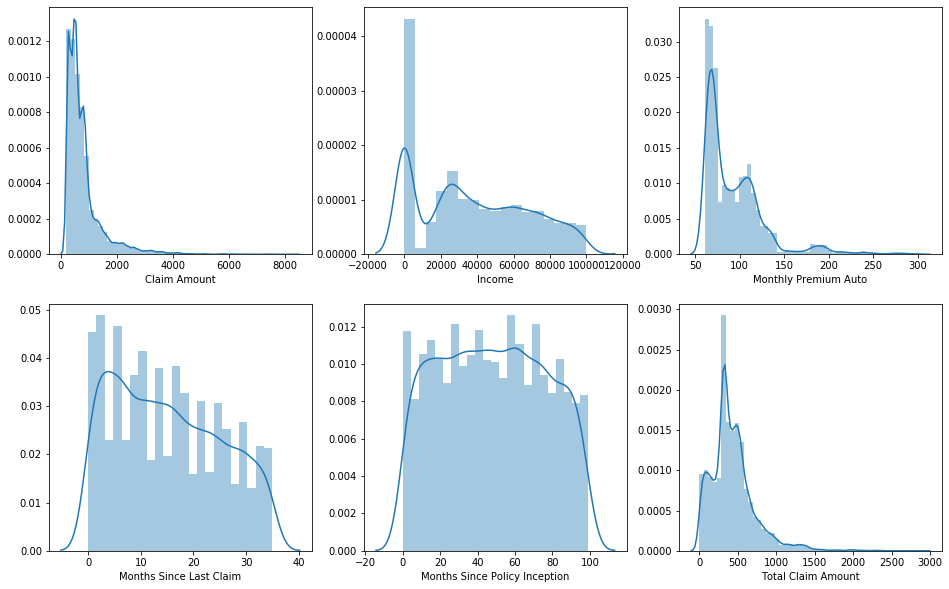

In [65]:
# checking the disribution of each feature
plt.figure(figsize=(16,10))       
for i,var in enumerate(num_var):
    plt.subplot(2,3,i+1)
    sns.distplot(df[var])

<Figure size 720x288 with 0 Axes>

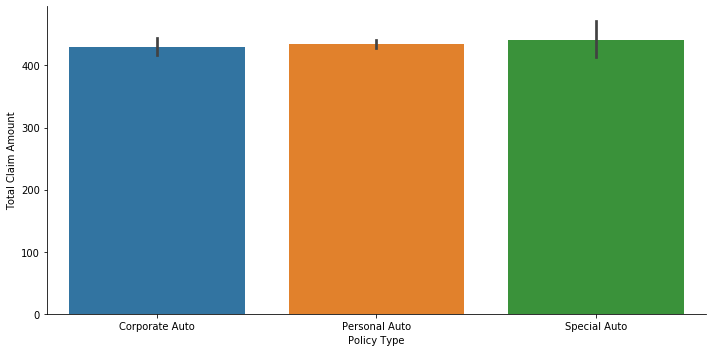

In [29]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'Policy Type' ,y = 'Total Claim Amount' ,data = df, aspect = 2 , kind = 'bar')

<Figure size 720x288 with 0 Axes>

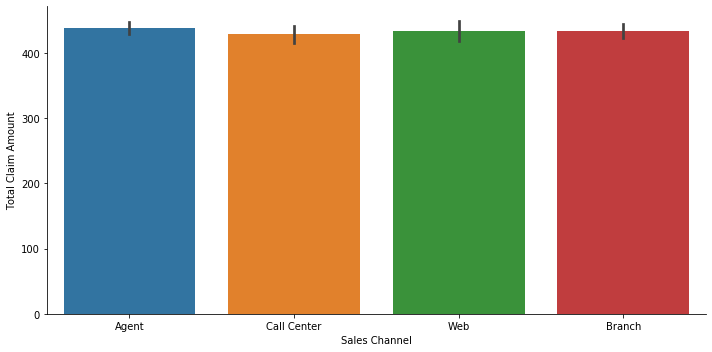

In [30]:
plt.figure(figsize=(10,4)) 
sns.catplot(x = 'Sales Channel' ,y = 'Total Claim Amount' ,data = df, aspect = 2 , kind = 'bar')

# Data Processing

In [198]:
# removing the redundant columns from the dataset.
df_drop =  df.drop(['Country','State','Policy Type','Sales Channel'],1)

In [199]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     9134 non-null   object 
 1   Claim Amount                   9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [200]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df_drop, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Claim Amount *******


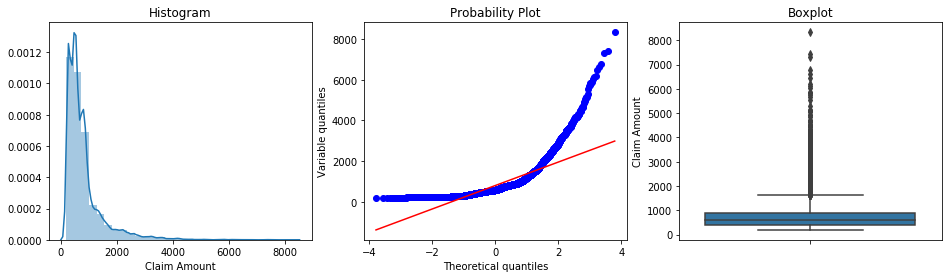

******* Income *******


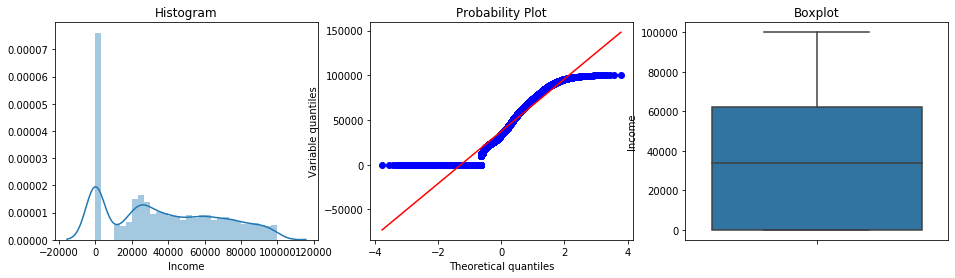

******* Monthly Premium Auto *******


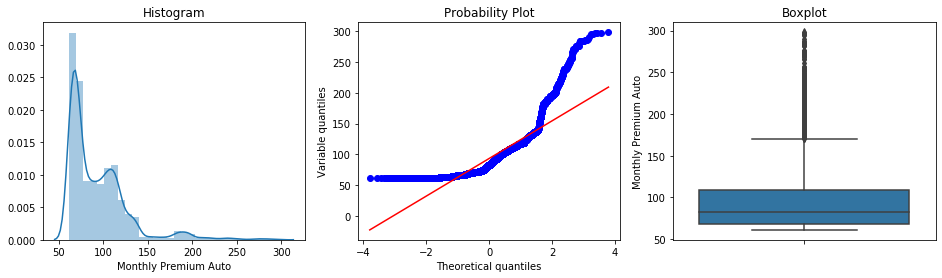

******* Months Since Last Claim *******


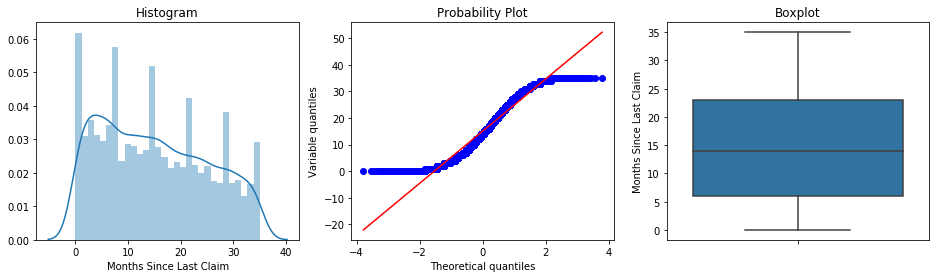

******* Months Since Policy Inception *******


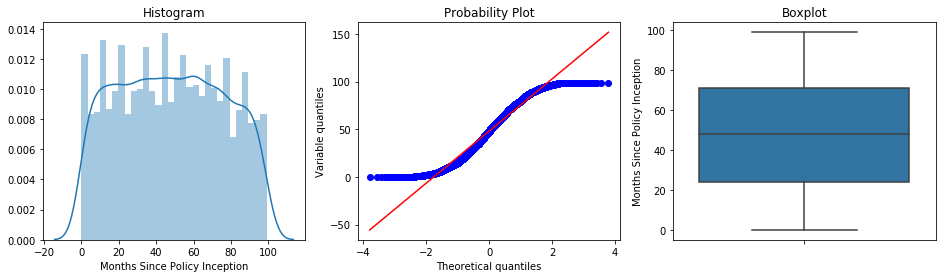

******* Total Claim Amount *******


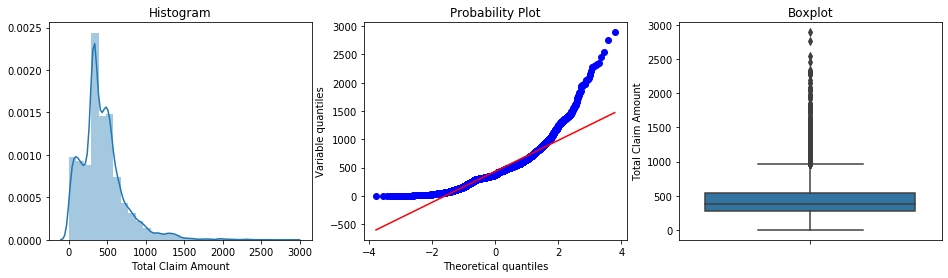

In [201]:
#  Checking the outliers
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df_drop, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [202]:
# Removing the outliers
from scipy.stats import zscore
z_scores = stats.zscore(df_drop[num_var])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_drop = df_drop[filtered_entries]

In [203]:
df.shape

(9134, 24)

In [204]:
df_drop.shape

(8670, 20)

In [205]:
9134-8670

464

As we can see the outliers have been removed from the dataframe

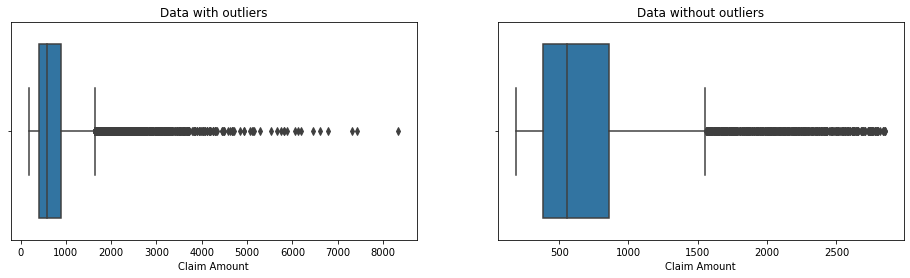

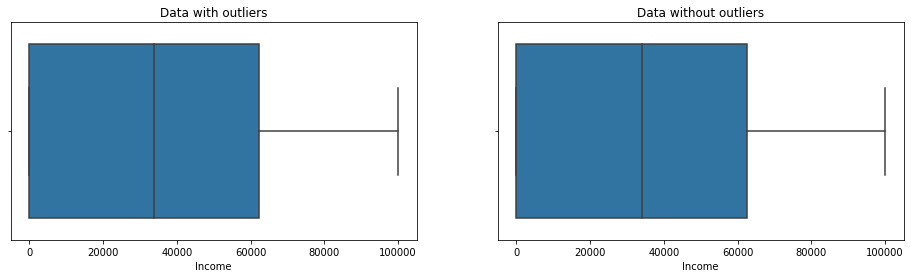

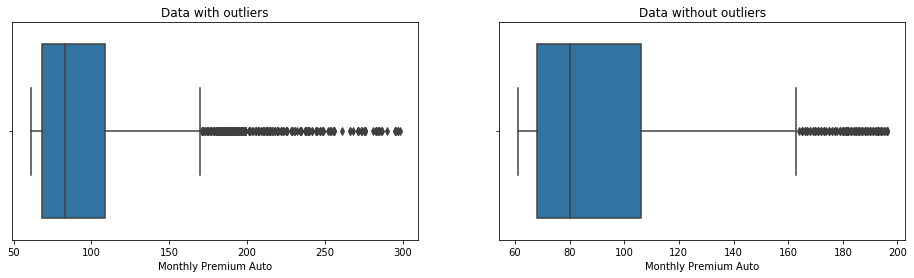

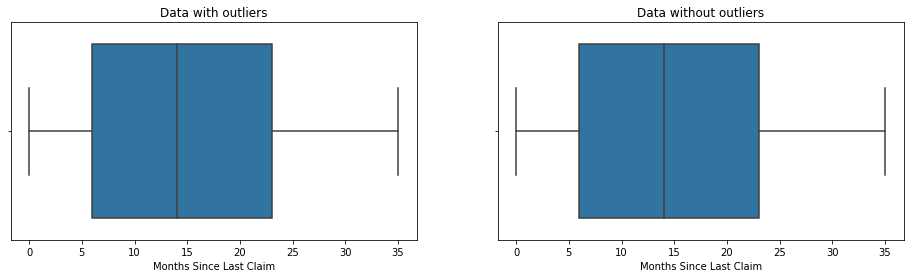

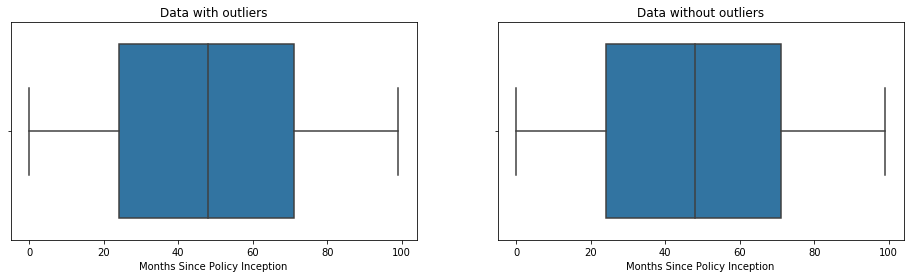

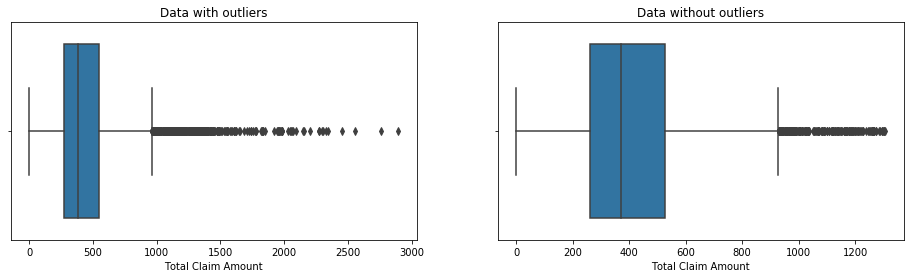

In [206]:
# before and after removing the outliers
for col in num_var:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_drop[col])
    plt.title('Data without outliers')

In [207]:
# Checking the skewness 
df_drop.skew()

Claim Amount                     1.856954
Income                           0.282329
Monthly Premium Auto             1.325766
Months Since Last Claim          0.280130
Months Since Policy Inception    0.047685
Number of Open Complaints        2.784816
Number of Policies               1.229137
Total Claim Amount               0.713125
dtype: float64

In [208]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_drop[num_var]).skew()

Claim Amount                     1.074508
Income                          -0.494488
Monthly Premium Auto             0.969712
Months Since Last Claim         -0.439394
Months Since Policy Inception   -0.585831
Total Claim Amount              -0.331597
dtype: float64

In [209]:
# Treating the skewness using log Transformation
np.log1p(df_drop[num_var]).skew()

Claim Amount                     0.363631
Income                          -1.118608
Monthly Premium Auto             0.693190
Months Since Last Claim         -1.002219
Months Since Policy Inception   -1.514490
Total Claim Amount              -1.924222
dtype: float64

In [210]:
# Finalysing the Sqrt Transformation 
df_drop[num_var] = np.sqrt(df_drop[num_var])

In [211]:
# Checking the skewness after treating with Sqrt Transformation
df_drop.skew()

Claim Amount                     1.074508
Income                          -0.494488
Monthly Premium Auto             0.969712
Months Since Last Claim         -0.439394
Months Since Policy Inception   -0.585831
Number of Open Complaints        2.784816
Number of Policies               1.229137
Total Claim Amount              -0.331597
dtype: float64

In [212]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8670 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     8670 non-null   object 
 1   Claim Amount                   8670 non-null   float64
 2   Response                       8670 non-null   object 
 3   Coverage                       8670 non-null   object 
 4   Education                      8670 non-null   object 
 5   EmploymentStatus               8670 non-null   object 
 6   Gender                         8670 non-null   object 
 7   Income                         8670 non-null   float64
 8   Location Code                  8670 non-null   object 
 9   Marital Status                 8670 non-null   object 
 10  Monthly Premium Auto           8670 non-null   float64
 11  Months Since Last Claim        8670 non-null   float64
 12  Months Since Policy Inception  8670 non-null   f

### Encoding the Categorical Features 

In [226]:
df_copy = df_drop.copy()

In [227]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [228]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_copy.columns[1:]:
    if df_copy[col].dtype == 'object':
        if len(list(df_copy[col].unique())) <= 2:
            le.fit(df_copy[col])
            df_copy[col] = le.transform(df_copy[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [229]:
# convert rest of categorical variable into dummy
df_copy = pd.get_dummies(df_copy, drop_first=True)

In [230]:
df_copy.head()

Claim Amount  Response  Gender      Income  Monthly Premium Auto  \
0     16.623836         0       0  237.221416              8.306624   
1     26.418811         0       0    0.000000              9.695360   
2     35.899069         0       0  220.832516             10.392305   
3     27.651152         0       1    0.000000             10.295630   
4     16.774065         0       1  209.370485              8.544004   

   Months Since Last Claim  Months Since Policy Inception  \
0                 5.656854                       2.236068   
1                 3.605551                       6.480741   
2                 4.242641                       6.164414   
3                 4.242641                       8.062258   
4                 3.464102                       6.633250   

   Number of Open Complaints  Number of Policies  Total Claim Amount  ...  \
0                          0                   1           19.616604  ...   
1                          0                   8           33.637255  ...   
2                          0                   2           23.800677  ...   
3                          0                   7           23.019152  ...   
4                          0                   1           11.752909  ...   

   Claim Reason_Hail  Claim Reason_Other  Claim Reason_Scratch/Dent  \
0                  0                   0                          0   
1                  0                   0                          1   
2                  0                   0                          0   
3                  0                   0                          0   
4                  0                   0                          0   

   Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  1   
4                         0                         0                  0   

   Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  Vehicle Size_Medsize  \
0                         0                           1                     1   
1                         0                           0                     1   
2                         0                           1                     1   
3                         0                           0                     1   
4                         0                           0                     1   

   Vehicle Size_Small  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 46 columns]

In [232]:
df_copy.shape

(8670, 46)

In [233]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_copy_col = list(df_copy.columns)
df_copy_col.remove('Claim Amount')
for col in df_copy_col:
    df_copy[col] = df_copy[col].astype(float)
    df_copy[[col]] = scaler.fit_transform(df_copy[[col]])

In [236]:
df_copy.head()

Claim Amount  Response  Gender    Income  Monthly Premium Auto  \
0     16.623836       0.0     0.0  3.751156              0.400965   
1     26.418811       0.0     0.0  0.000000              1.522767   
2     35.899069       0.0     0.0  3.492000              2.085751   
3     27.651152       0.0     5.0  0.000000              2.007658   
4     16.774065       0.0     5.0  3.310753              0.592717   

   Months Since Last Claim  Months Since Policy Inception  \
0                 4.780914                       1.123666   
1                 3.047247                       3.256695   
2                 3.585686                       3.097735   
3                 3.585686                       4.051437   
4                 2.927700                       3.333333   

   Number of Open Complaints  Number of Policies  Total Claim Amount  ...  \
0                        0.0               0.000            2.694754  ...   
1                        0.0               4.375            4.652183  ...   
2                        0.0               0.625            3.278894  ...   
3                        0.0               3.750            3.169785  ...   
4                        0.0               0.000            1.596900  ...   

   Claim Reason_Hail  Claim Reason_Other  Claim Reason_Scratch/Dent  \
0                0.0                 0.0                        0.0   
1                0.0                 0.0                        5.0   
2                0.0                 0.0                        0.0   
3                0.0                 0.0                        0.0   
4                0.0                 0.0                        0.0   

   Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                       0.0                       0.0                0.0   
1                       0.0                       0.0                0.0   
2                       0.0                       0.0                0.0   
3                       0.0                       0.0                5.0   
4                       0.0                       0.0                0.0   

   Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  Vehicle Size_Medsize  \
0                       0.0                         5.0                   5.0   
1                       0.0                         0.0                   5.0   
2                       0.0                         5.0                   5.0   
3                       0.0                         0.0                   5.0   
4                       0.0                         0.0                   5.0   

   Vehicle Size_Small  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 46 columns]

In [240]:
x = df_copy.drop('Claim Amount',1)
y = df_copy['Claim Amount']

In [262]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= .20, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (6936, 45)
Shape of y_train =  (6936,)
Shape of x_test =  (1734, 45)
Shape of y_test =  (1734,)


In [263]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [264]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=1 , random_state= 46 )
RI=Ridge(alpha=1 , random_state= 46)
EN=ElasticNet(alpha=1 , random_state= 46)
KNR=KNeighborsRegressor(n_neighbors= 28)
DTR=DecisionTreeRegressor(random_state=87)
ABR=AdaBoostRegressor(random_state=90)
RFR=RandomForestRegressor(random_state=85)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=63)
XGR=XGBRegressor(random_state=93)

In [265]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [266]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x_test,y_test).mean()    
    cvs.append(round(score,3))

In [267]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})

In [268]:
print(result.sort_values(by = 'R2_score',ascending=True))

                       Model  R2_score  Mean_Squared_Error  Cross_val_score
5        KNeighborsRegressor  0.086961              52.481            0.032
3                 ElasticNet  0.123851              50.360            0.121
1                      Lasso  0.126234              50.223            0.121
2                      Ridge  0.142777              49.272            0.132
0           LinearRegression  0.142785              49.272            0.132
4      DecisionTreeRegressor  0.671226              18.898            0.698
8  GradientBoostingRegressor  0.717298              16.249            0.703
6          AdaBoostRegressor  0.772814              13.058            0.781
9               XGBRegressor  0.837624               9.333            0.812
7      RandomForestRegressor  0.856998               8.220            0.840


### As we can see from above trials the best performance is given by RandomForestRegressor so it is the final model selected

In [272]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(RFR,'Insurance_Claim_amount.pkl')

['Insurance_Claim_amount.pkl']

# PART 2

In [5]:
df = pd.read_csv('Auto_insurance_fraud.csv')

In [144]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [146]:
df.shape

(1000, 40)

In [147]:
# percentage of missing values in the dataframe
df.isna().mean()*100

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [148]:
# checking the correaltions 
df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

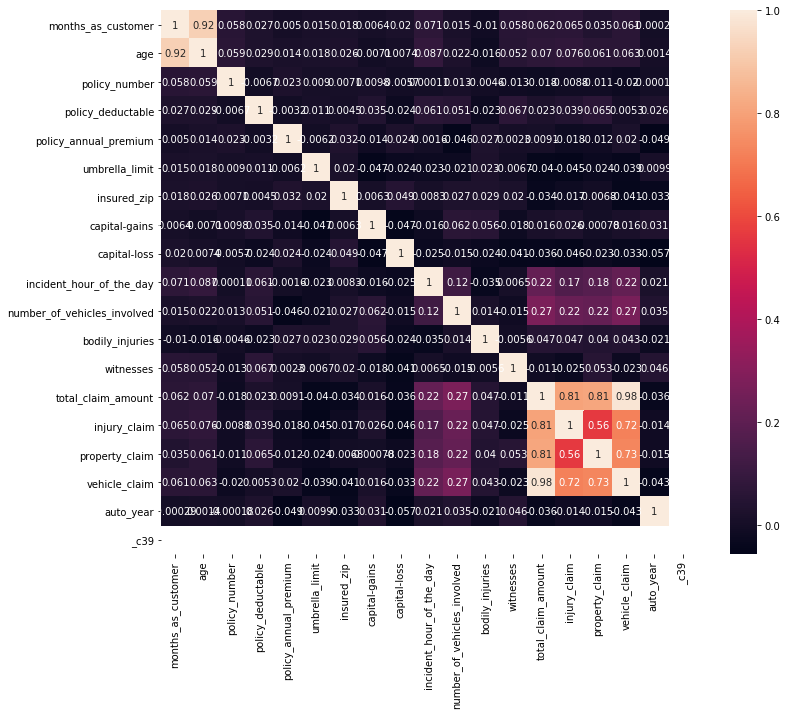

In [149]:
# Plotting the correaltions
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot =True)

In [150]:
for i in df.columns:
    print("unique counts for", i ,"is", df[i].nunique() )

unique counts for months_as_customer is 391
unique counts for age is 46
unique counts for policy_number is 1000
unique counts for policy_bind_date is 951
unique counts for policy_state is 3
unique counts for policy_csl is 3
unique counts for policy_deductable is 3
unique counts for policy_annual_premium is 991
unique counts for umbrella_limit is 11
unique counts for insured_zip is 995
unique counts for insured_sex is 2
unique counts for insured_education_level is 7
unique counts for insured_occupation is 14
unique counts for insured_hobbies is 20
unique counts for insured_relationship is 6
unique counts for capital-gains is 338
unique counts for capital-loss is 354
unique counts for incident_date is 60
unique counts for incident_type is 4
unique counts for collision_type is 4
unique counts for incident_severity is 4
unique counts for authorities_contacted is 5
unique counts for incident_state is 7
unique counts for incident_city is 7
unique counts for incident_location is 1000
unique c

In [151]:
# Dropping the redundant columns
df.drop(['policy_number','policy_csl','policy_bind_date','policy_state','insured_relationship','insured_hobbies','incident_date','authorities_contacted','incident_state','incident_city','incident_location',
          'incident_hour_of_the_day','number_of_vehicles_involved','_c39'], axis = 1 , inplace = True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_deductable        1000 non-null   int64  
 3   policy_annual_premium    1000 non-null   float64
 4   umbrella_limit           1000 non-null   int64  
 5   insured_zip              1000 non-null   int64  
 6   insured_sex              1000 non-null   object 
 7   insured_education_level  1000 non-null   object 
 8   insured_occupation       1000 non-null   object 
 9   capital-gains            1000 non-null   int64  
 10  capital-loss             1000 non-null   int64  
 11  incident_type            1000 non-null   object 
 12  collision_type           1000 non-null   object 
 13  incident_severity        1000 non-null   object 
 14  property_damage          

In [153]:
num_var = df.select_dtypes( include= ['int64', 'float64']).keys()

In [154]:
cat_var = df.select_dtypes( include= ['object']).keys()

# EDA

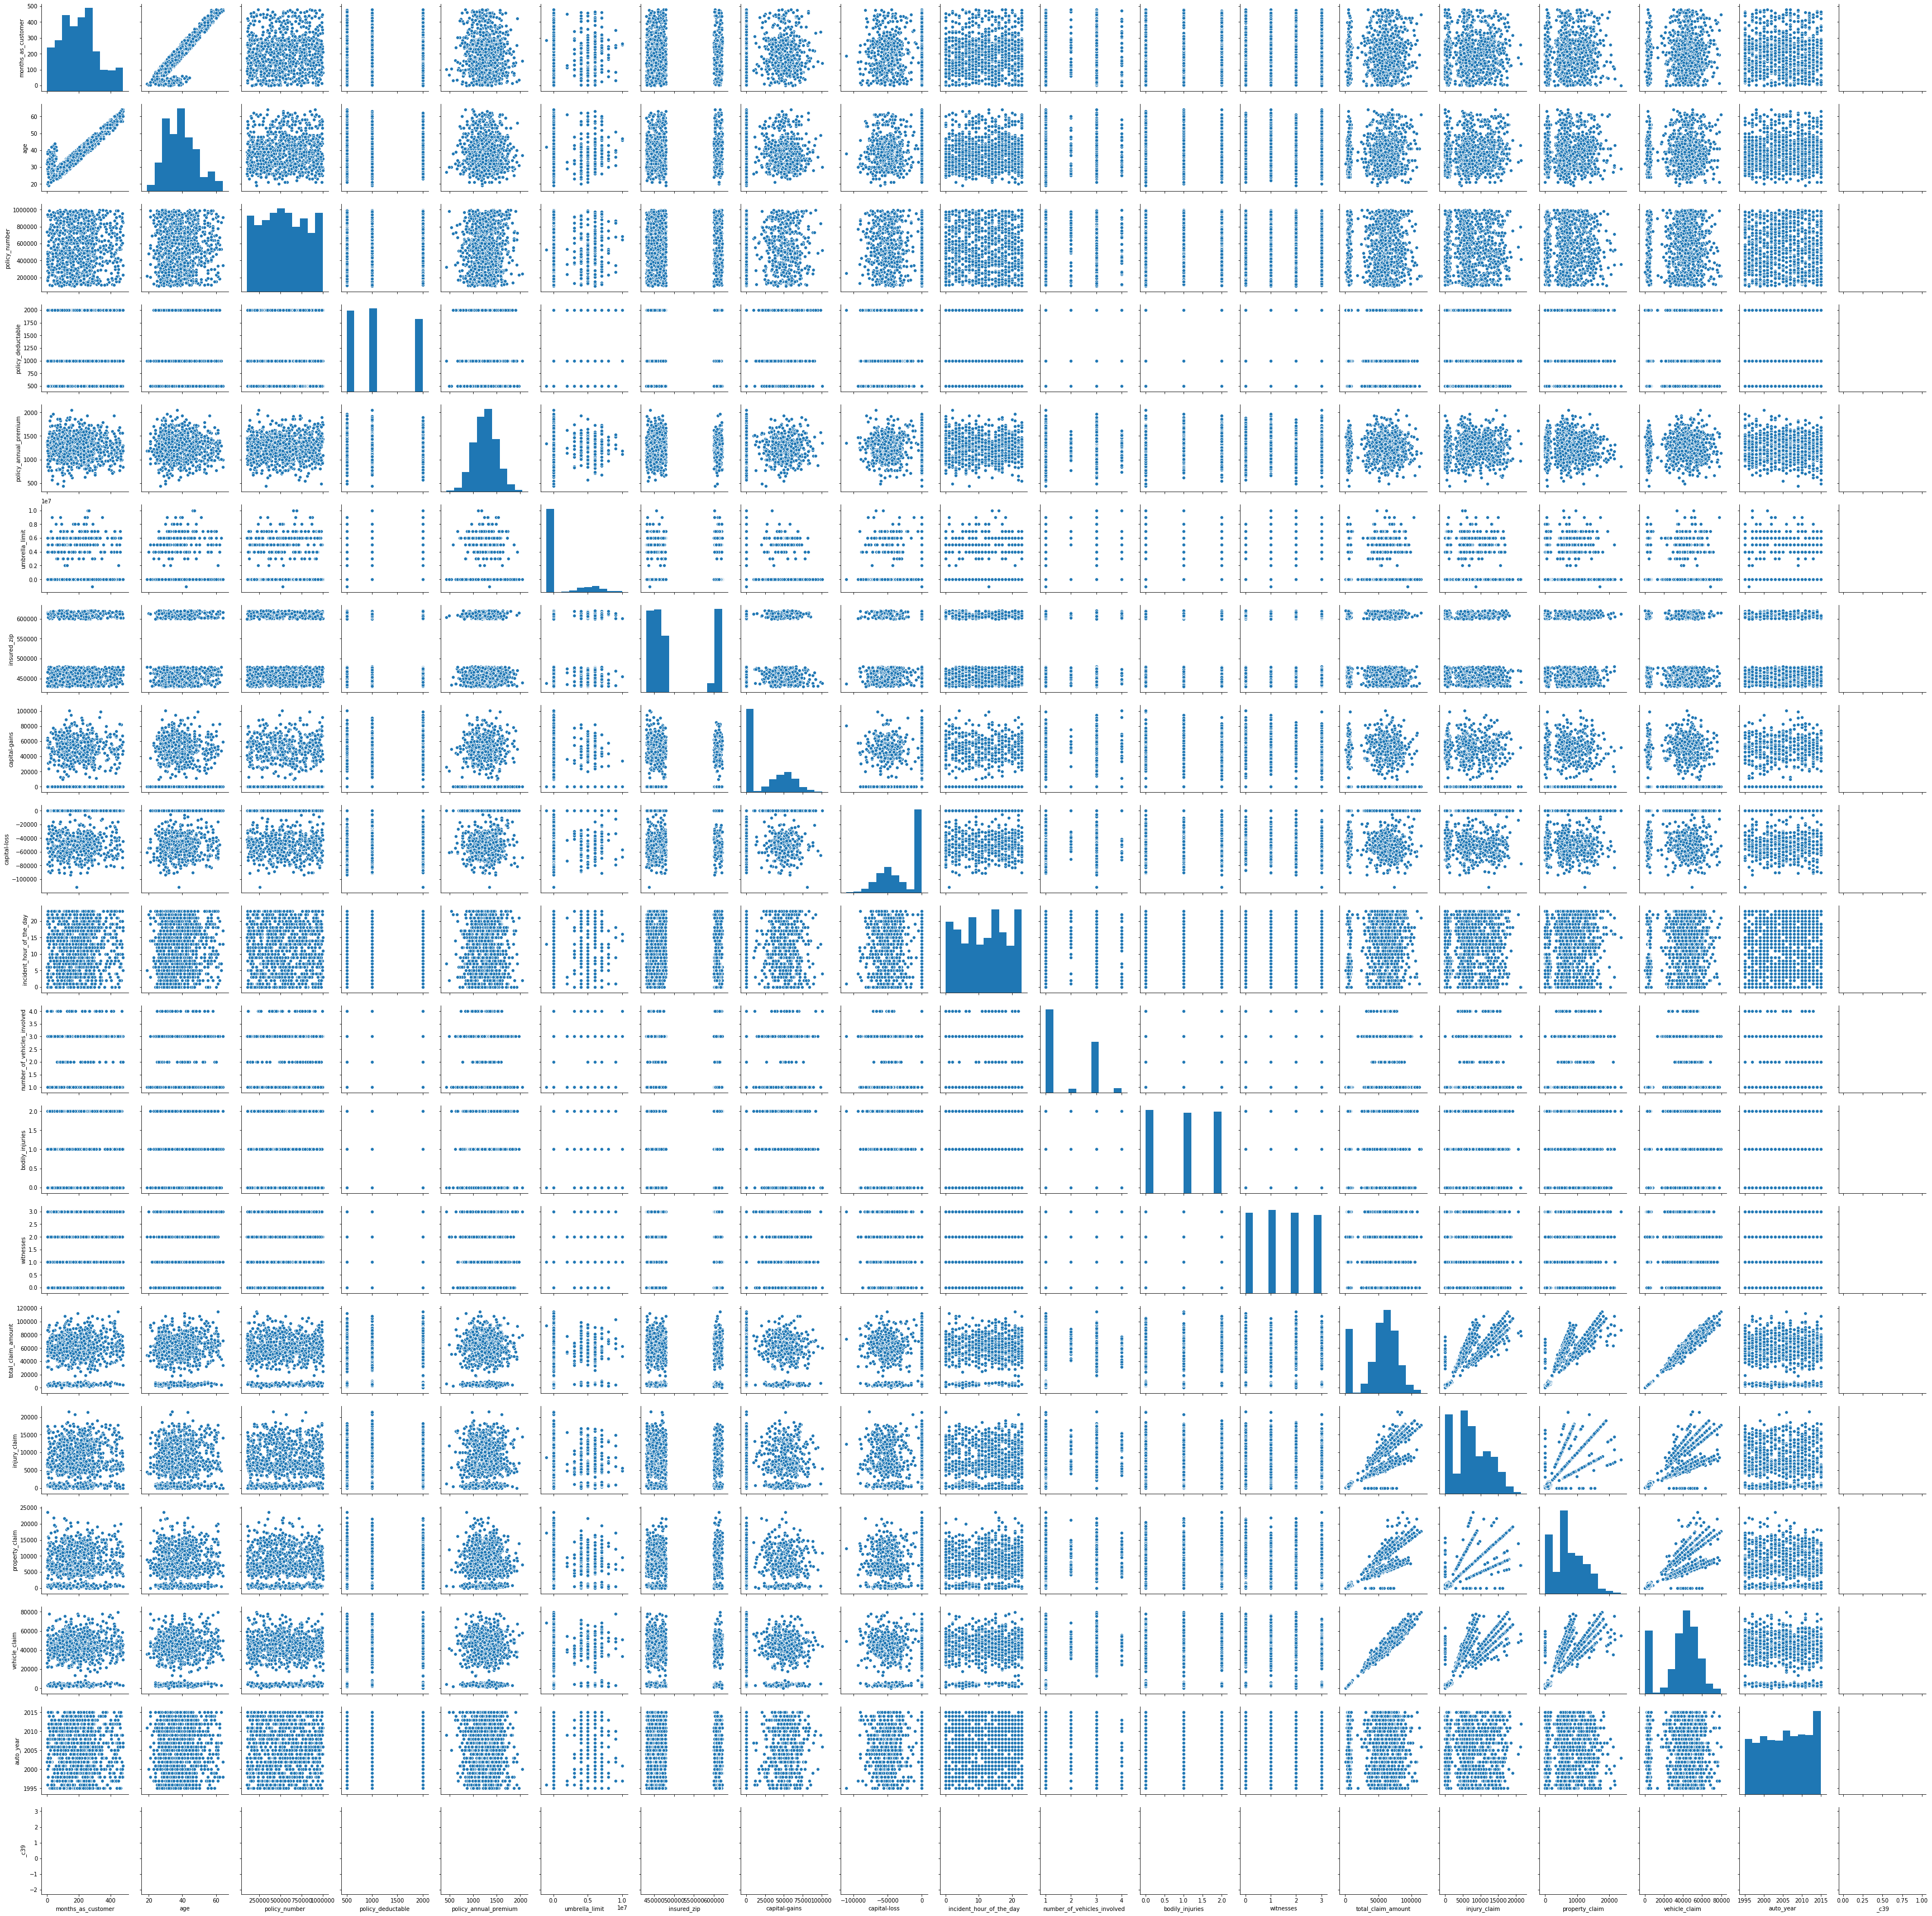

In [6]:
sns.pairplot(df)

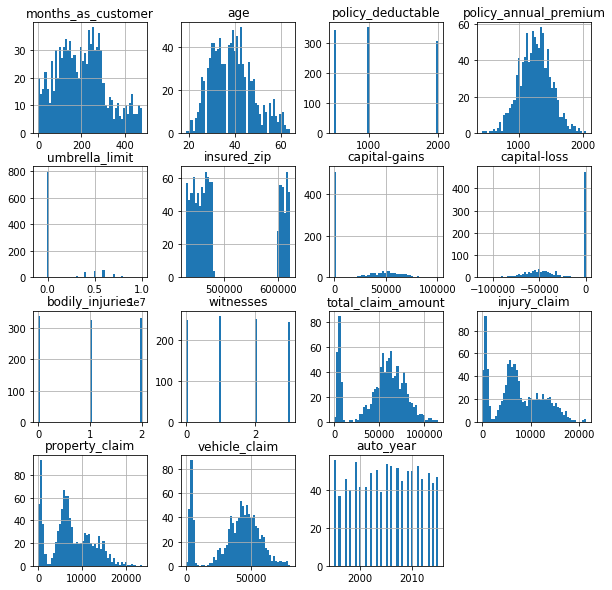

In [155]:
df.hist(bins=50, figsize = (10,10))
plt.show()

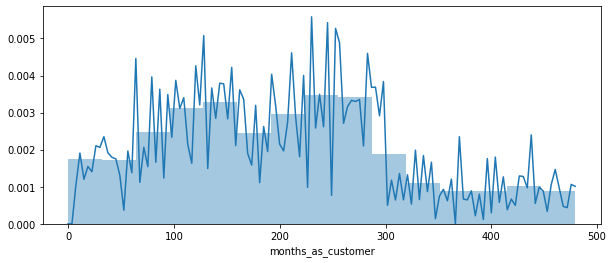

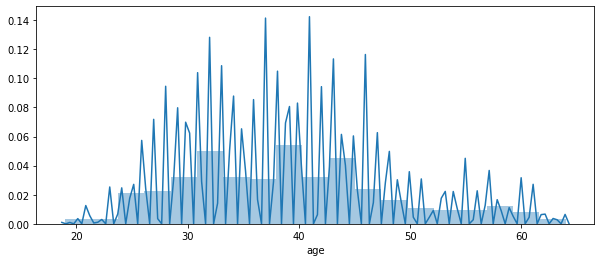

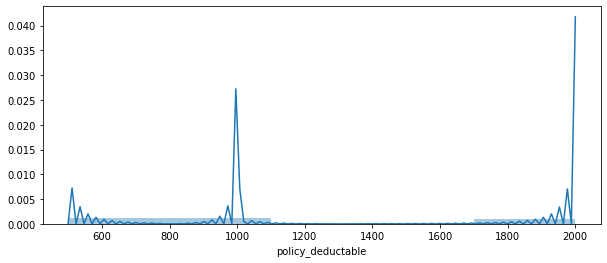

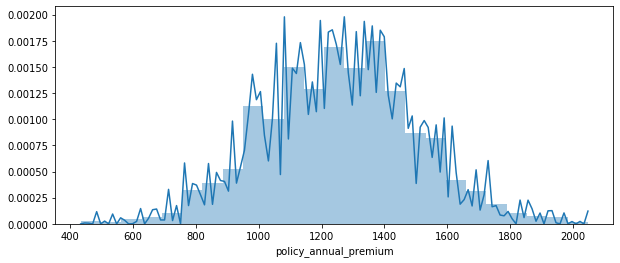

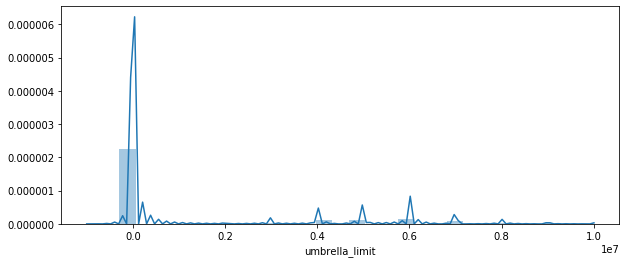

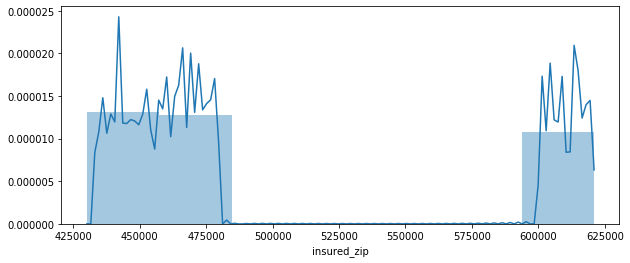

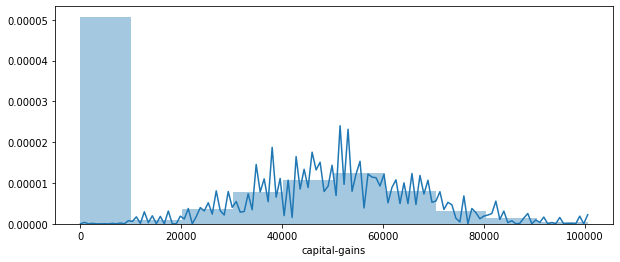

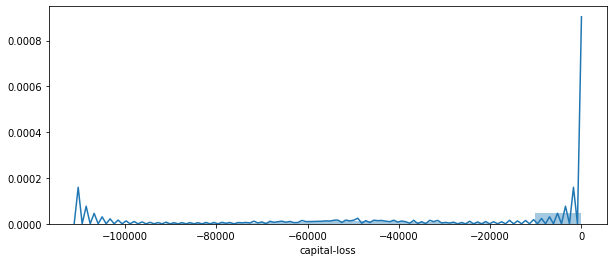

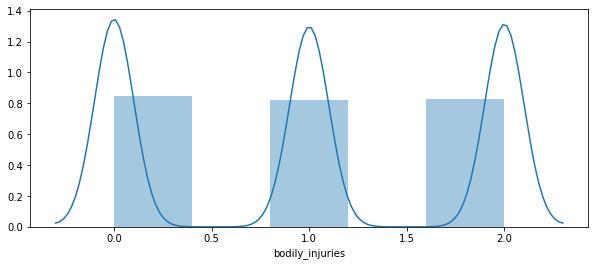

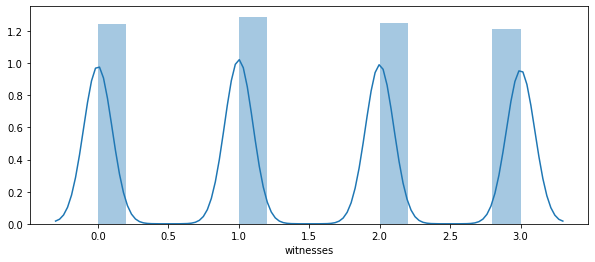

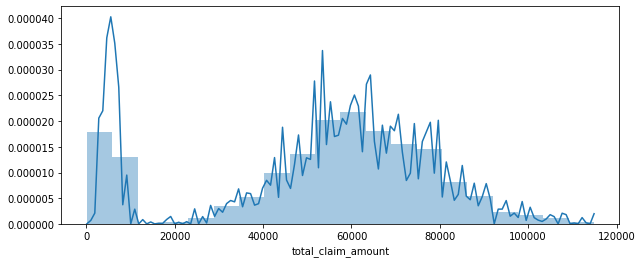

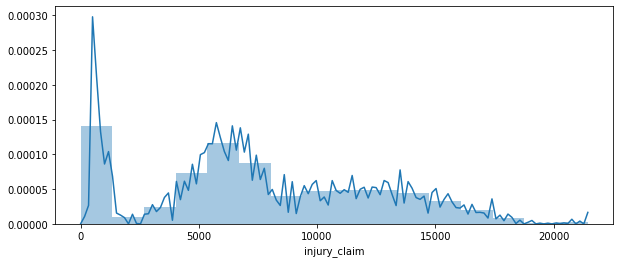

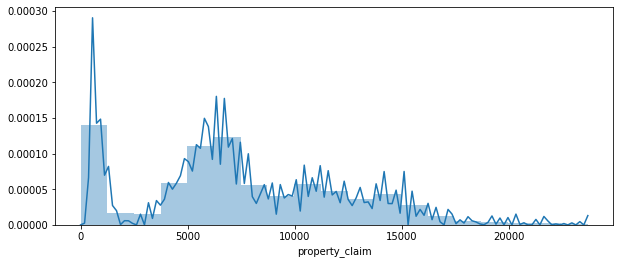

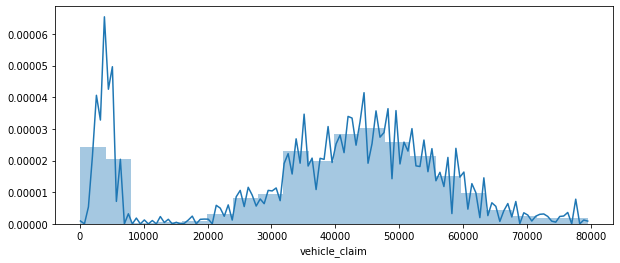

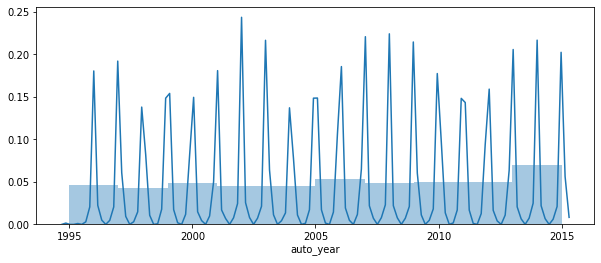

In [157]:
for col in num_var:
    plt.figure(figsize=(10,4))
    sns.distplot(df[col], kde_kws={'bw':0.1})

##### Univariate analysis

In [158]:
df_clean = df.copy()

In [159]:
df.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

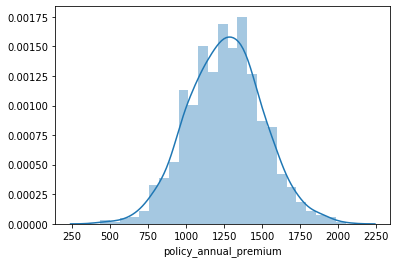

In [160]:
sns.distplot(df.policy_annual_premium)

In [161]:
df.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [162]:
# Majority of the values in umbrella_limit is 0 do dropping the feature
df_clean.drop('umbrella_limit',1,inplace=True)

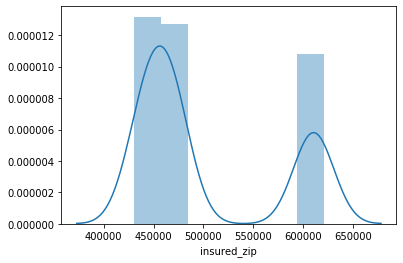

In [163]:
sns.distplot(df.insured_zip)

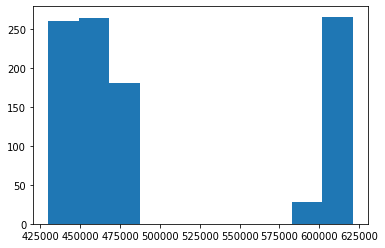

In [164]:
plt.hist(df.insured_zip);

In [165]:
#  Most of the values lies in 2 categories so changing the feature 
df_clean.insured_zip = df_clean.insured_zip.apply(lambda x: 1 if x > 500000 else 0)
df_clean.rename(columns={'insured_zip':'insured_zip_above_5L'},inplace=True)

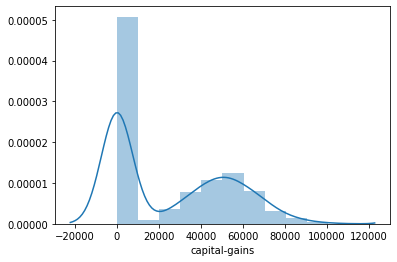

In [166]:
sns.distplot(df['capital-gains'])

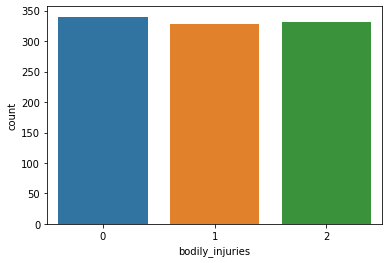

In [167]:
sns.countplot(df.bodily_injuries)

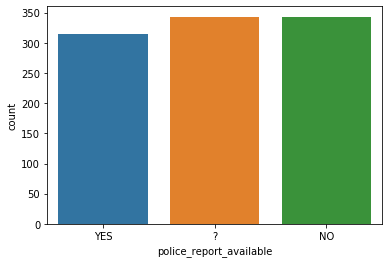

In [168]:
sns.countplot(df.police_report_available)

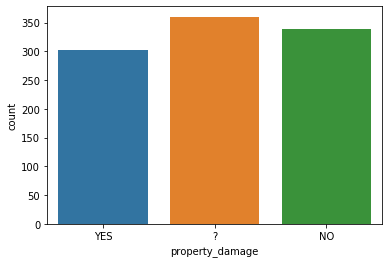

In [169]:
sns.countplot(df.property_damage)

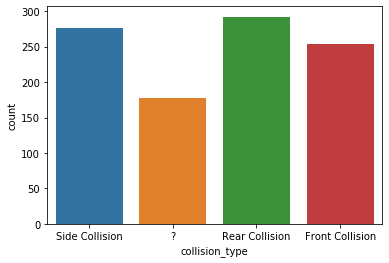

In [170]:
sns.countplot(df_clean.collision_type)

In [176]:
df_clean.replace('?',np.NaN , inplace= True)

In [177]:
df_clean.isna().mean()*100

months_as_customer          0.0
age                         0.0
policy_deductable           0.0
policy_annual_premium       0.0
insured_zip_above_5L        0.0
insured_sex                 0.0
insured_education_level     0.0
insured_occupation          0.0
capital-gains               0.0
capital-loss                0.0
incident_type               0.0
collision_type             17.8
incident_severity           0.0
property_damage            36.0
bodily_injuries             0.0
witnesses                   0.0
police_report_available    34.3
total_claim_amount          0.0
injury_claim                0.0
property_claim              0.0
vehicle_claim               0.0
auto_make                   0.0
auto_model                  0.0
auto_year                   0.0
fraud_reported              0.0
dtype: float64

In [178]:
# Dropping columns with more than 20% missing values
df_clean.drop(['property_damage','police_report_available'],1,inplace=True)

In [179]:
df_clean.collision_type.isnull().sum()

178

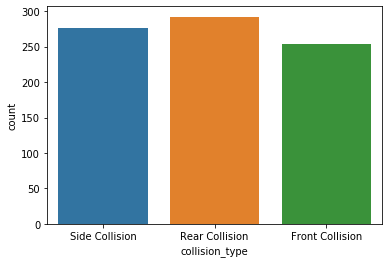

In [180]:
sns.countplot(df_clean['collision_type'])

In [181]:
df_clean['collision_type'].fillna(df_clean['collision_type'].mode()[0], inplace = True)

In [182]:
df_clean.collision_type.isnull().sum()

0

# Data Processing

In [184]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df_clean, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30 , kde_kws={'bw':0.1})
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* months_as_customer *******


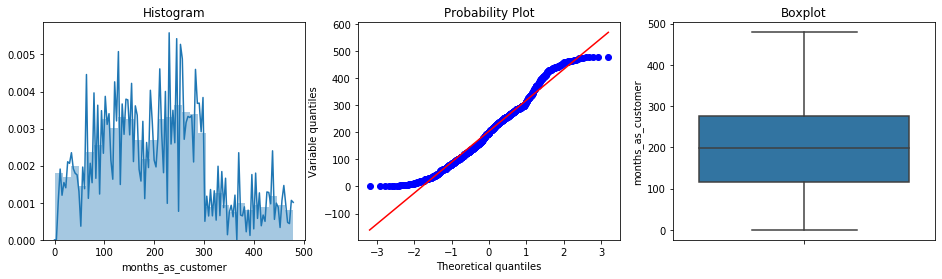

******* age *******


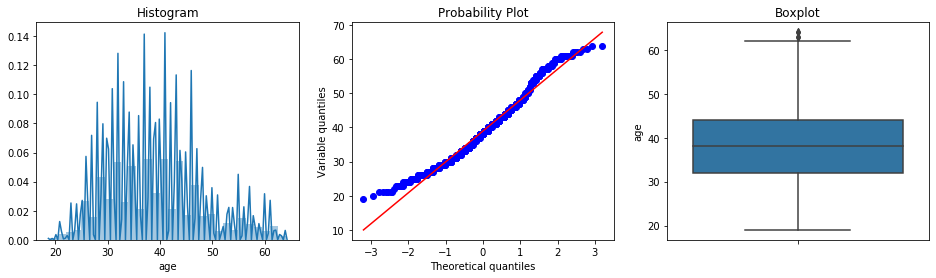

******* policy_deductable *******


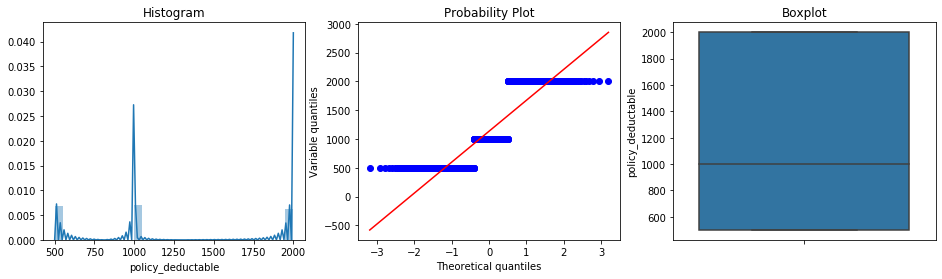

******* policy_annual_premium *******


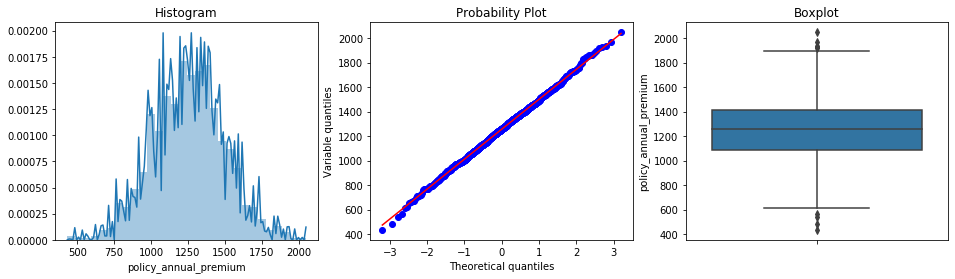

******* umbrella_limit *******


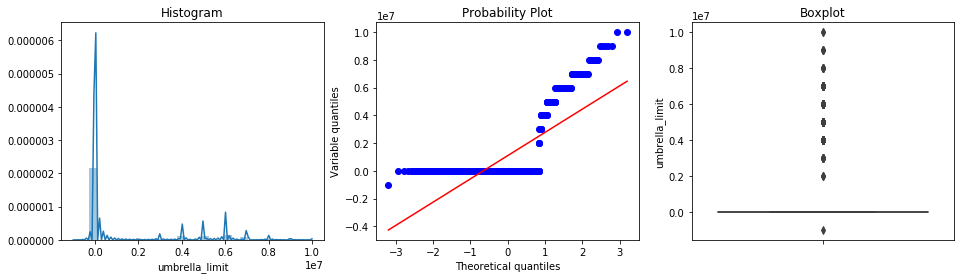

******* insured_zip *******


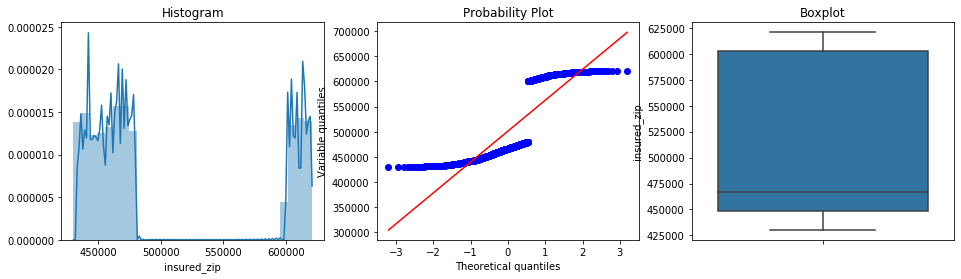

******* capital-gains *******


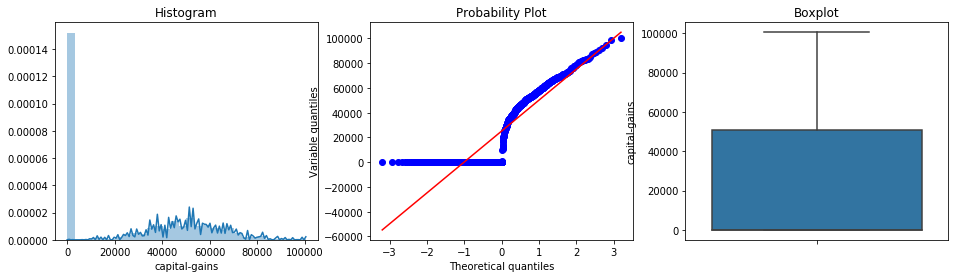

******* capital-loss *******


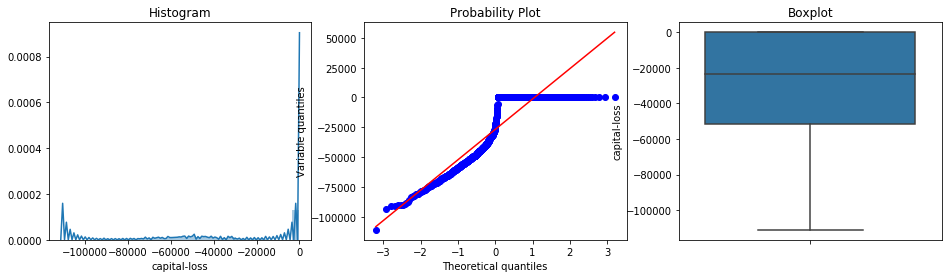

******* bodily_injuries *******


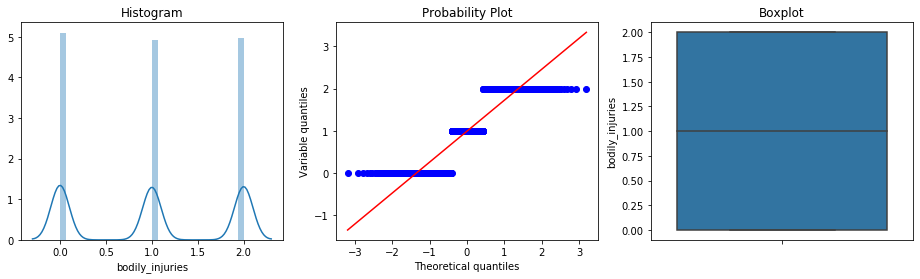

******* witnesses *******


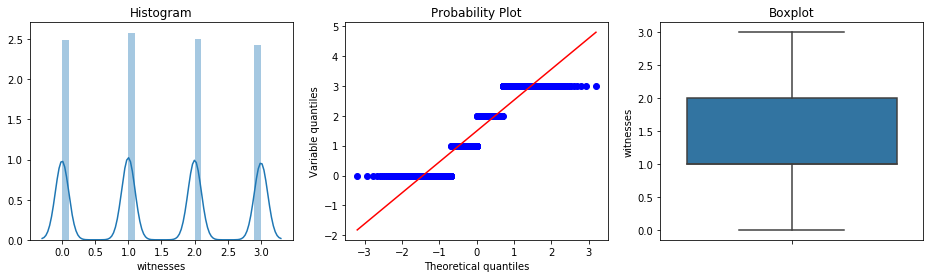

******* total_claim_amount *******


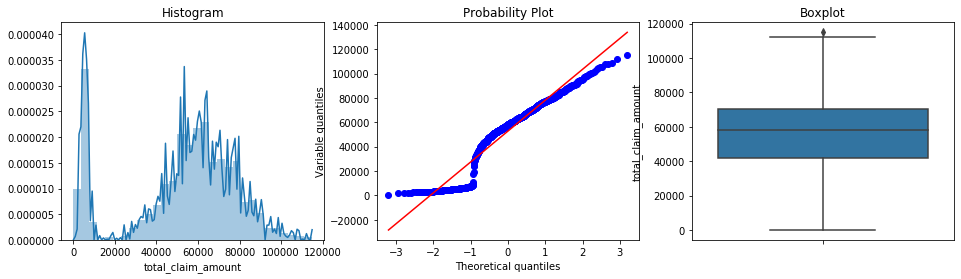

******* injury_claim *******


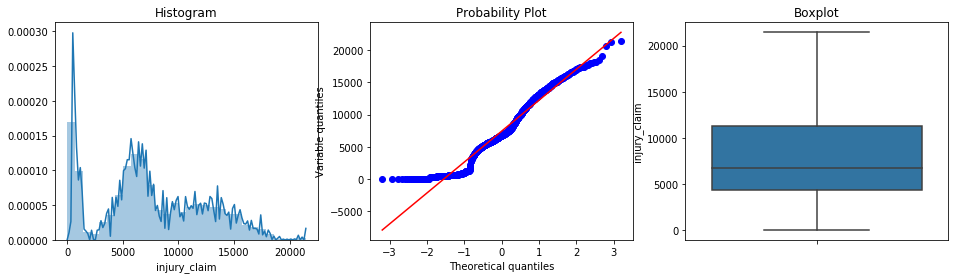

******* property_claim *******


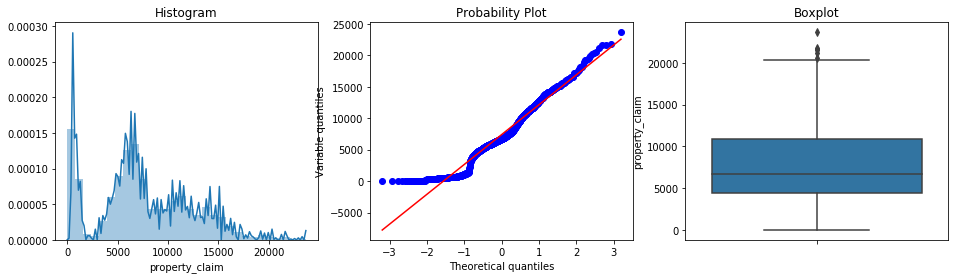

******* vehicle_claim *******


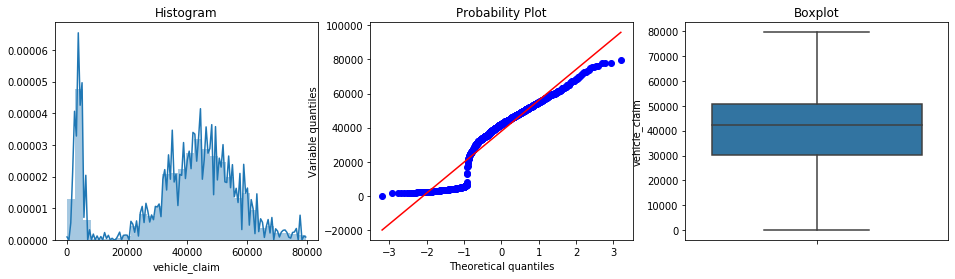

******* auto_year *******


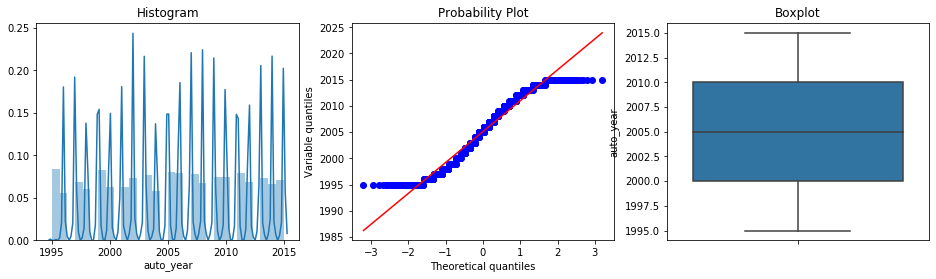

In [185]:
#  Checking the outliers
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df_clean, var)

  # here we observe outlier using histogram,, qq plot and boxplot

In [186]:
numr_var = df_clean.select_dtypes(include= ['int64','float']).keys()

In [187]:
# Removing the outliers
from scipy.stats import zscore
z_scores = stats.zscore(df_clean[numr_var])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_final = df_clean[filtered_entries]

In [188]:
df.shape

(1000, 26)

In [189]:
df_final.shape

(995, 23)

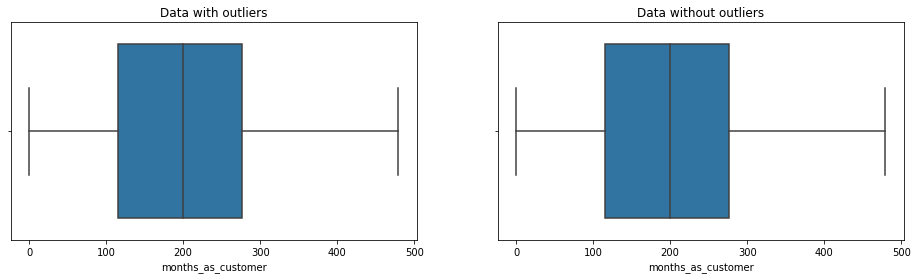

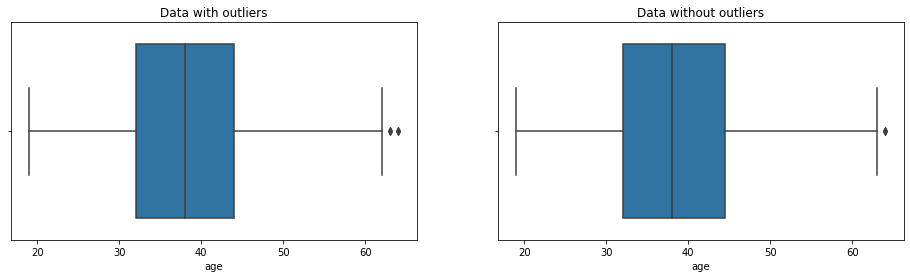

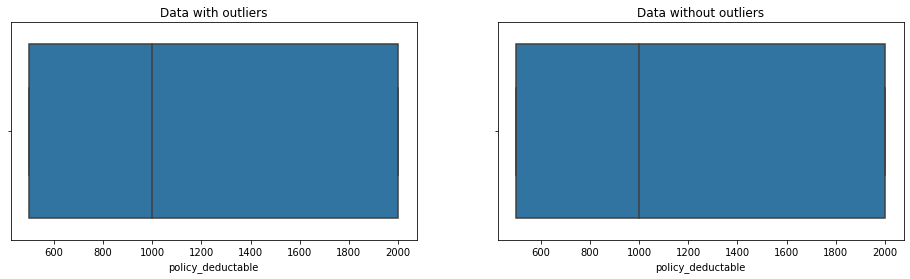

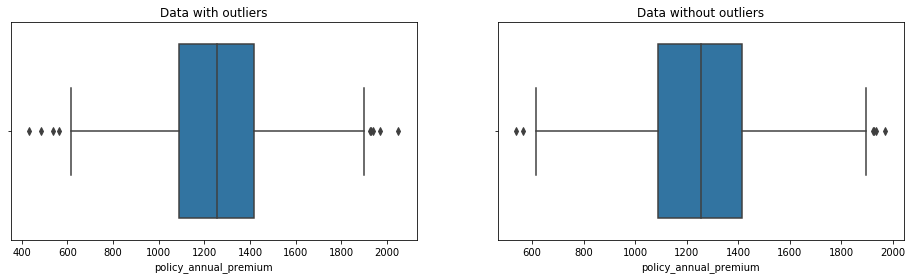

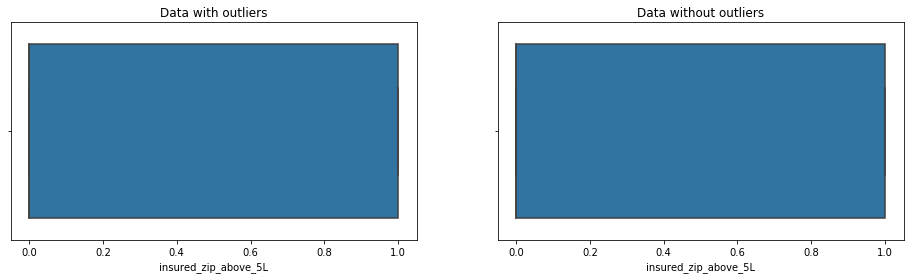

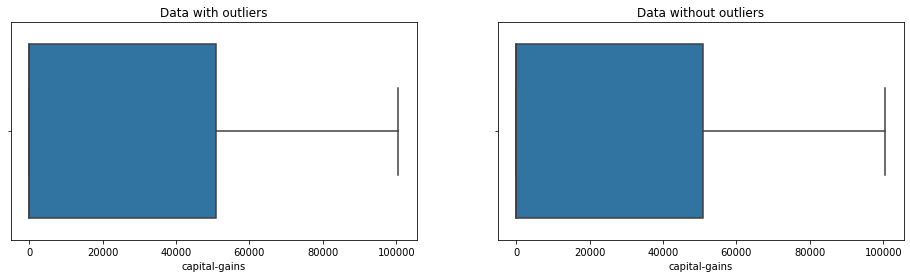

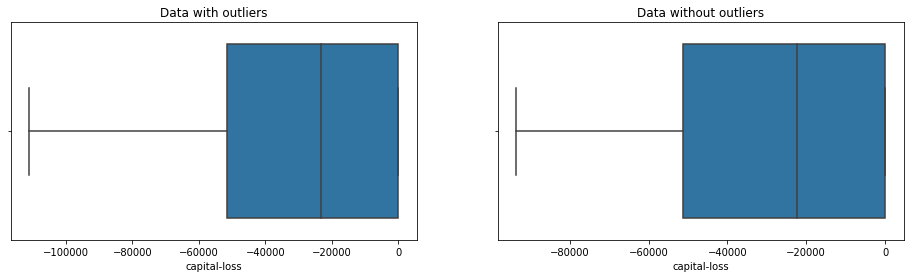

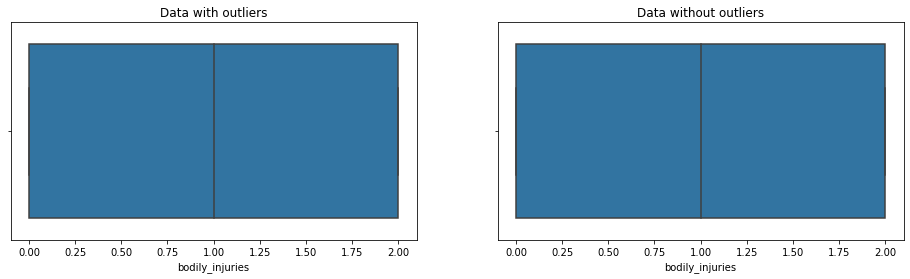

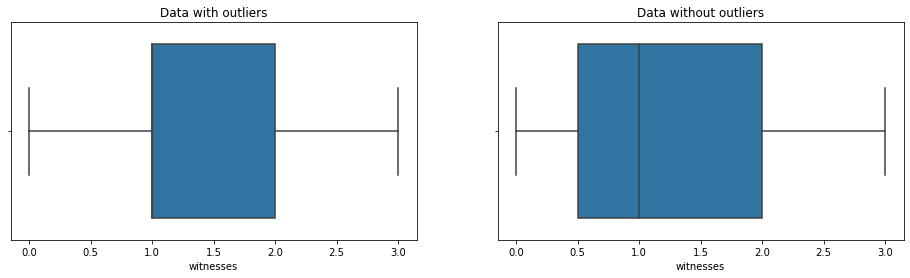

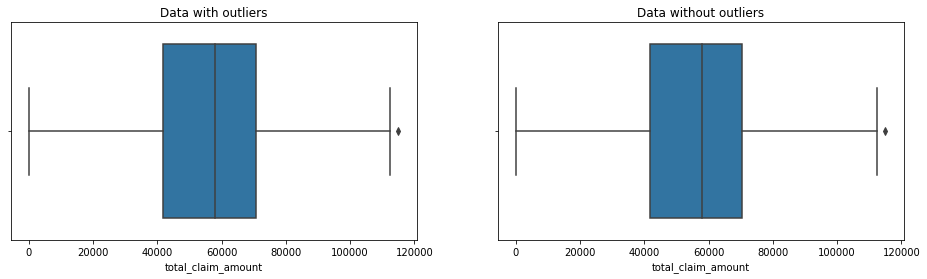

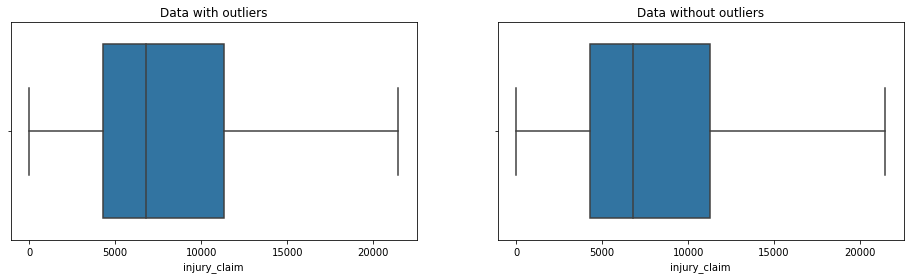

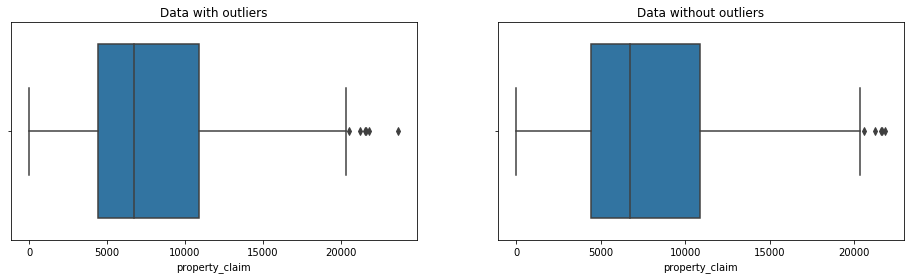

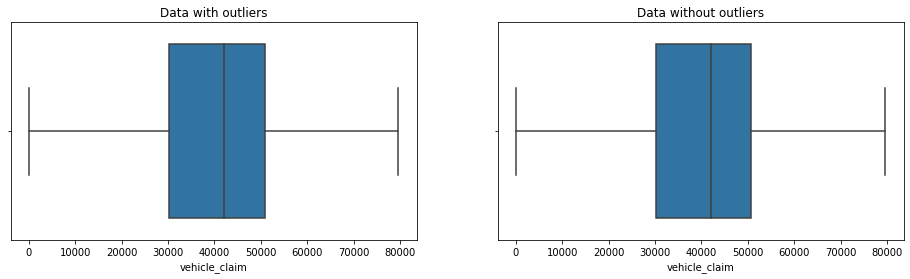

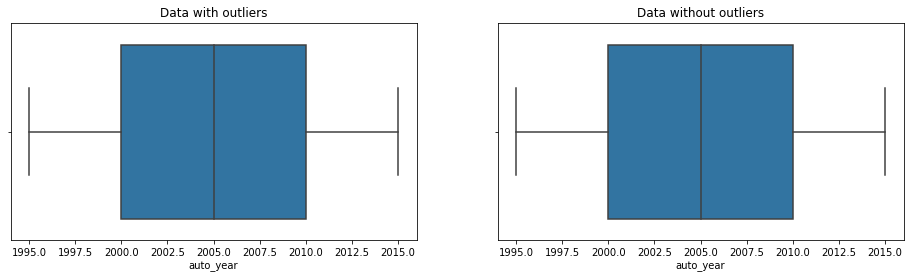

In [190]:
# before and after removing the outliers
for col in numr_var:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df_clean[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_final[col])
    plt.title('Data without outliers')

In [196]:
# Checking the skewness 
df_final.skew()

months_as_customer       0.358958
age                      0.473974
policy_deductable        0.475849
policy_annual_premium    0.033107
insured_zip_above_5L     0.913845
capital-gains            0.479472
capital-loss            -0.379708
bodily_injuries          0.012979
witnesses                0.027371
total_claim_amount      -0.591848
injury_claim             0.270253
property_claim           0.359528
vehicle_claim           -0.618189
auto_year               -0.049758
dtype: float64

In [198]:
df_copy = df_final

In [199]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [200]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_copy.columns[1:]:
    if df_copy[col].dtype == 'object':
        if len(list(df_copy[col].unique())) <= 2:
            le.fit(df_copy[col])
            df_copy[col] = le.transform(df_copy[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [201]:
# convert rest of categorical variable into dummy
df_copy = pd.get_dummies(df_copy, drop_first=True)

In [202]:
df_copy.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   insured_zip_above_5L  insured_sex  capital-gains  capital-loss  \
0                     0            1          53300             0   
1                     0            1              0             0   
2                     0            0          35100             0   
3                     1            0          48900        -62400   
4                     1            1          66000        -46000   

   bodily_injuries  witnesses  ...  auto_model_Pathfinder  auto_model_RAM  \
0                1          2  ...                      0               0   
1                0          0  ...                      0               0   
2                2          3  ...                      0               1   
3                1          2  ...                      0               0   
4                0          1  ...                      0               0   

   auto_model_RSX  auto_model_Silverado  auto_model_TL  auto_model_Tahoe  \
0               0                     0              0                 0   
1               0                     0              0                 0   
2               0                     0              0                 0   
3               0                     0              0                 1   
4               1                     0              0                 0   

   auto_model_Ultima  auto_model_Wrangler  auto_model_X5  auto_model_X6  
0                  0                    0              0              0  
1                  0                    0              0              0  
2                  0                    0              0              0  
3                  0                    0              0              0  
4                  0                    0              0              0  

[5 rows x 94 columns]

In [207]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_copy_col = list(df_copy.columns)
df_copy_col.remove('fraud_reported')
for col in df_copy_col:
    df_copy[col] = df_copy[col].astype(float)
    df_copy[[col]] = scaler.fit_transform(df_copy[[col]])

In [208]:
df_copy.head()

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            3.423800  3.222222           1.666667               3.034454   
1            2.379958  2.555556           5.000000               2.302020   
2            1.398747  1.111111           5.000000               3.056215   
3            2.672234  2.444444           5.000000               3.065297   
4            2.379958  2.777778           1.666667               3.652704   

   insured_zip_above_5L  insured_sex  capital-gains  capital-loss  \
0                   0.0          5.0       2.651741      5.000000   
1                   0.0          5.0       0.000000      5.000000   
2                   0.0          0.0       1.746269      5.000000   
3                   5.0          0.0       2.432836      1.666667   
4                   5.0          5.0       3.283582      2.542735   

   bodily_injuries  witnesses  ...  auto_model_Pathfinder  auto_model_RAM  \
0              2.5   3.333333  ...                    0.0             0.0   
1              0.0   0.000000  ...                    0.0             0.0   
2              5.0   5.000000  ...                    0.0             5.0   
3              2.5   3.333333  ...                    0.0             0.0   
4              0.0   1.666667  ...                    0.0             0.0   

   auto_model_RSX  auto_model_Silverado  auto_model_TL  auto_model_Tahoe  \
0             0.0                   0.0            0.0               0.0   
1             0.0                   0.0            0.0               0.0   
2             0.0                   0.0            0.0               0.0   
3             0.0                   0.0            0.0               5.0   
4             5.0                   0.0            0.0               0.0   

   auto_model_Ultima  auto_model_Wrangler  auto_model_X5  auto_model_X6  
0                0.0                  0.0            0.0            0.0  
1                0.0                  0.0            0.0            0.0  
2                0.0                  0.0            0.0            0.0  
3                0.0                  0.0            0.0            0.0  
4                0.0                  0.0            0.0            0.0  

[5 rows x 94 columns]

In [209]:
x = df_copy.drop('fraud_reported',1)
y = df_copy['fraud_reported']

In [210]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= .20, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (796, 93)
Shape of y_train =  (796,)
Shape of x_test =  (199, 93)
Shape of y_test =  (199,)


In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [212]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [213]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [215]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [216]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7035175879396985


Cross_Val_Score =  0.7131578947368421


roc_auc_score =  0.5454657771188535


classification_report
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       142
           1       0.45      0.18      0.25        57

    accuracy                           0.70       199
   macro avg       0.59      0.55      0.53       199
weighted avg       0.65      0.70      0.65       199



[[130  12]
 [ 47  10]]
*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_st

In [218]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

                        Model  Accuracy_score  Cross_val_score  Roc_auc_curve
4                  GaussianNB       52.763819        43.184211      50.623919
0        KNeighborsClassifier       70.351759        71.315789      54.546578
5      RandomForestClassifier       70.854271        71.842105      51.748209
7        ExtraTreesClassifier       73.869347        75.868421      58.061527
8          AdaBoostClassifier       75.376884        71.342105      63.843588
1                         SVC       75.879397        73.868421      63.145540
6  GradientBoostingClassifier       76.381910        73.868421      64.547813
2          LogisticRegression       77.386935        68.315789      66.302199
3      DecisionTreeClassifier       77.889447        64.815789      69.279713


### As we can see from above trials the best performance is given by DecisionTreeClassifier so it is the final model selected

In [219]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(DT,'Auto_ins_fraud.pkl')

['Auto_ins_fraud.pkl']